### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
ipl = pd.read_csv('ipl_2023_dataset.csv')

#### Look and feel of data

In [3]:
ipl.head()

,Unnamed: 0,Player Name,Type,Price Cr,Team
0,0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings


In [4]:
ipl.columns

Index(['Unnamed: 0', 'Player Name', 'Type', 'Price Cr', 'Team'], dtype='object')

In [5]:
ipl.describe()

,Unnamed: 0,Price Cr
count,568.000000,243.000000
mean,283.500000,3.746914
std,164.111751,4.584679
min,0.000000,0.200000
25%,141.750000,0.225000
50%,283.500000,1.500000
75%,425.250000,6.375000
max,567.000000,18.500000


#### Length of the dataset

In [6]:
len(ipl)

568

#### Null analysis

In [7]:
ipl.isnull().sum()

Unnamed: 0       0
Player Name      0
Type             0
Price Cr       325
Team             0
dtype: int64

In [8]:
ipl[pd.isnull(ipl["Price Cr"])==True]

,Unnamed: 0,Player Name,Type,Price Cr,Team
243,243,Tom Banton,Wicket-Keeper,NaN,Unsold
244,244,Kusal Mendis,Wicket-Keeper,NaN,Unsold
245,245,Chris Jordan,Bowler,NaN,Unsold
246,246,Adam Milne,Bowler,NaN,Unsold
247,247,Mujeeb Rahman,Bowler,NaN,Unsold
...,...,...,...,...,...
563,563,Dhruv Patel,All-Rounder,NaN,Unsold
564,564,Jack Prestwidge,All-Rounder,NaN,Unsold
565,565,Aditya Sarvate,All-Rounder,NaN,Unsold
566,566,Sagar Solanki,All-Rounder,NaN,Unsold


Price is null because, the players are not sold. Hence, not dealing with nulls

## EDA

In [9]:
ipl.shape

(568, 5)

Data has 568 rows and 5 columns

### Dropping Index

In [10]:
ipl = ipl.drop(['Unnamed: 0'], axis=1)

In [11]:
ipl.columns

Index(['Player Name', 'Type', 'Price Cr', 'Team'], dtype='object')

### Teams

In [12]:
ipl_teams = ipl.Team.value_counts()

In [13]:
ipl_teams = ipl_teams.reset_index()

In [14]:
ipl_teams = ipl_teams.rename(columns = {'index':'Team_name','Team':'Player_Count'})

#### Participating Teams

In [15]:
ipl_teams[ipl_teams['Team_name'] != 'Unsold']['Team_name']

1                 Gujarat Titans
2                 Delhi Capitals
3               Rajasthan Royals
4    Royal Challengers Bangalore
5            Chennai Super Kings
6           Lucknow Super Giants
7            Sunrisers Hyderabad
8                 Mumbai Indians
9                   Punjab Kings
Name: Team_name, dtype: object

There are a total of 9 teams participating in the auction
- Gujarat Titans
- Delhi Capitals
- Rajasthan Royals
- Royal Challengers Bangalore
- Lucknow Super Giants
- Sunrisers Hyderabad
- Chennai Super Kings
- Mumbai Indians
- Punjab Kings

#### Count of people brought by teams

In [16]:
ipl_teams[ipl_teams['Team_name'] != 'Unsold']

,Team_name,Player_Count
1,Gujarat Titans,47
2,Delhi Capitals,25
3,Rajasthan Royals,25
4,Royal Challengers Bangalore,25
5,Chennai Super Kings,25
6,Lucknow Super Giants,25
7,Sunrisers Hyderabad,25
8,Mumbai Indians,24
9,Punjab Kings,22


There are a total of 9 teams participating in the auction
- Gujarat Titans brought 47 players
- Delhi Capitals brought 25 players
- Rajasthan Royals brought 25 players
- Royal Challengers Bangalore brought 25 players
- Lucknow Super Giants brought 25 players
- Sunrisers Hyderabad brought 25 players
- Chennai Super Kings brought 25 players
- Mumbai Indians brought 24 players
- Punjab Kings brought 22 players

#### Amount spent by each team

In [17]:
ipl_teams_totalSpending = ipl[['Team','Price Cr']].groupby(['Team'],as_index=False).sum().sort_values('Price Cr',ascending = False)

In [18]:
ipl_teams_totalSpending

,Team,Price Cr
2,Gujarat Titans,183.90
4,Mumbai Indians,94.95
0,Chennai Super Kings,93.50
7,Royal Challengers Bangalore,93.25
6,Rajasthan Royals,91.65
3,Lucknow Super Giants,91.45
1,Delhi Capitals,90.55
8,Sunrisers Hyderabad,88.45
5,Punjab Kings,82.80
9,Unsold,0.00


Gujarat Titans spent the most in IPL 2023 Auction

In [19]:
ipl_teams_avgSpending = ipl[['Team','Price Cr']].groupby(['Team'],as_index=False).mean().sort_values('Price Cr',ascending = False)

In [20]:
ipl_teams_avgSpending

,Team,Price Cr
4,Mumbai Indians,3.956250
2,Gujarat Titans,3.912766
5,Punjab Kings,3.763636
0,Chennai Super Kings,3.740000
7,Royal Challengers Bangalore,3.730000
6,Rajasthan Royals,3.666000
3,Lucknow Super Giants,3.658000
1,Delhi Capitals,3.622000
8,Sunrisers Hyderabad,3.538000
9,Unsold,NaN


Mumbai Indians spent higher amount on each player, followed by Gujarat Titans

#### Highest Paid Player in each team

In [21]:
ipl_teams_highestPaid = ipl[['Team','Price Cr','Player Name']].groupby(['Team'],as_index=False).agg({'Price Cr':'max','Player Name':'first'}).sort_values('Price Cr',ascending = False)

In [22]:
ipl_teams_highestPaid[ipl_teams_highestPaid['Team'] != 'Unsold']

,Team,Price Cr,Player Name
5,Punjab Kings,18.50,Sam Curran
4,Mumbai Indians,17.50,Cameron Green
3,Lucknow Super Giants,17.00,KL Rahul
0,Chennai Super Kings,16.25,Ben Stokes
1,Delhi Capitals,16.00,Rishabh Pant
2,Gujarat Titans,16.00,Hardik Pandya
7,Royal Challengers Bangalore,15.00,Virat Kohli
6,Rajasthan Royals,14.00,Sanju Samson
8,Sunrisers Hyderabad,13.25,Harry Brook


#### Team investment Interest

In [23]:
invs_avg = ipl[['Team','Type','Price Cr']].groupby(['Team','Type'],as_index=False).mean()

In [24]:
invs_avg

,Team,Type,Price Cr
0,Chennai Super Kings,All-Rounder,5.294444
1,Chennai Super Kings,Batter,2.441667
2,Chennai Super Kings,Bowler,2.133333
3,Chennai Super Kings,Wicket-Keeper,12.000000
4,Delhi Capitals,All-Rounder,4.837500
5,Delhi Capitals,Batter,3.118750
6,Delhi Capitals,Bowler,2.568182
7,Delhi Capitals,Wicket-Keeper,9.000000
8,Gujarat Titans,All-Rounder,5.600000
9,Gujarat Titans,Batter,4.122222


In [25]:
invs_avg = invs_avg[invs_avg['Team'] != 'Unsold']

In [26]:
invs_avg_max = invs_avg[['Team','Price Cr']].groupby(['Team'],as_index=False).agg({'Price Cr':'max'})

In [29]:
invs_avg_max_joined = pd.merge(invs_avg, invs_avg_max, on = ['Team','Price Cr'], how='right')

In [31]:
invs_avg_max_joined.sort_values('Price Cr', ascending=False)

,Team,Type,Price Cr
0,Chennai Super Kings,Wicket-Keeper,12.000000
3,Lucknow Super Giants,Wicket-Keeper,11.375000
1,Delhi Capitals,Wicket-Keeper,9.000000
4,Mumbai Indians,Wicket-Keeper,7.725000
8,Sunrisers Hyderabad,Batter,6.133333
2,Gujarat Titans,All-Rounder,5.600000
6,Rajasthan Royals,Batter,5.010000
5,Punjab Kings,All-Rounder,4.778571
7,Royal Challengers Bangalore,Wicket-Keeper,4.450000


It is interesting to understand that teams are investing more on wicket keepers

### Players Stats

#### Highest Paid Player

In [27]:
ipl.sort_values('Price Cr',ascending=False).head(5)

,Player Name,Type,Price Cr,Team
146,Sam Curran,All-Rounder,18.50,Punjab Kings
122,Cameron Green,All-Rounder,17.50,Mumbai Indians
97,KL Rahul,Batter,17.00,Lucknow Super Giants
0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
75,Andre Russell,All-Rounder,16.00,Gujarat Titans


#### Number of players in each type

In [45]:
ipl_players_types = ipl['Type'].value_counts()

In [50]:
ipl_players_types = ipl_players_types.reset_index()
ipl_players_types = ipl_players_types.rename(columns = {'index':'Type','Type':'Headcount'})

In [53]:
ipl_players_types.drop(['level_0'],axis=1,inplace=True)

In [54]:
ipl_players_types

,Type,Headcount
0,Bowler,203
1,All-Rounder,187
2,Batter,105
3,Wicket-Keeper,73


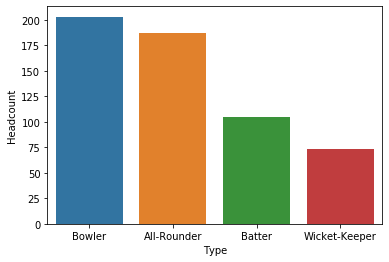

In [55]:
sns.barplot(x=ipl_players_types.Type,y=ipl_players_types.Headcount)